In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
data = pd.read_csv('/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Train/Date/date-2021-10-02.csv', usecols=['time','cgm'])

In [3]:
print(data)

                    time  cgm
0    2021-10-02 12:29:00   73
1    2021-10-02 12:34:00   70
2    2021-10-02 12:39:00   68
3    2021-10-02 12:44:00   66
4    2021-10-02 12:49:00   65
..                   ...  ...
134  2021-10-02 23:39:00   80
135  2021-10-02 23:44:00   82
136  2021-10-02 23:49:00   85
137  2021-10-02 23:54:00   88
138  2021-10-02 23:59:00   89

[139 rows x 2 columns]


In [4]:
#substituting the null values of glucose level with the mean of the other values, if present
n = data[data['cgm'].isnull()].index.tolist()
if len(n)!=0:
    data['cgm'][n] = np.mean(data['cgm'])

n = data[data['cgm'].isnull()].index.tolist()
if len(n)!=0:
    data['cgm'][n] = np.mean(data['cgm'])

In [5]:
#changing the data type of the date_time column from object to datetime
time = data['time']
data['time'] = pd.to_datetime(data['time'])

#removing seconds to ensure periodicity
data['time'] = pd.to_datetime(data['time']).dt.floor('T')

In [6]:
#creating new df for graphing purposes
tdi = pd.DatetimeIndex(data.time)
tdi = pd.date_range(tdi[0],tdi[-1],freq='300S')

for i in range(len(data.time)):
    if data.time[i]!=tdi[i]:
        print(data.time[i],tdi[i])
        print("Point till which data is consistent: ")
        print(data.time[i-1],tdi[i-1])
        break

data = data.iloc[0:i, :]
tdi = pd.DatetimeIndex(data.time)
tdi = pd.date_range(tdi[0],tdi[-1],freq='300S')

In [7]:
result = adfuller(data.cgm)
print(result)
print(len(data))
trainlen = int(0.9*len(data))
training = data[:trainlen]
testing = data[trainlen:]

(-1.9208396009968616, 0.3223218998014037, 4, 133, {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}, 626.7908336098786)
138


In [8]:
model = SARIMAX(training['cgm'], order=(3,1,4), seasonal_order=(3,1,2,7))
model_fit = model.fit()

fc60 = model_fit.forecast(12, alpha = 0.1).reset_index()
fc60.drop(columns='index', inplace=True)
mse60 = mean_squared_error(fc60, testing.iloc[0:12,1])

print('\n60 minute window:\nActual\tPredicted')
for i in range(12):
    print(testing['cgm'][trainlen+i], fc60['predicted_mean'][i])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55807D+00    |proj g|=  1.15992D-01

At iterate    5    f=  2.44857D+00    |proj g|=  5.87507D-02


 This problem is unconstrained.



At iterate   10    f=  2.44033D+00    |proj g|=  6.98970D-02

At iterate   15    f=  2.42076D+00    |proj g|=  4.64764D-02

At iterate   20    f=  2.41399D+00    |proj g|=  2.00573D-02

At iterate   25    f=  2.40833D+00    |proj g|=  2.21613D-02

At iterate   30    f=  2.40611D+00    |proj g|=  3.45163D-03

At iterate   35    f=  2.40461D+00    |proj g|=  1.23607D-02

At iterate   40    f=  2.40360D+00    |proj g|=  1.36854D-02

At iterate   45    f=  2.40323D+00    |proj g|=  3.17075D-03

At iterate   50    f=  2.40314D+00    |proj g|=  2.50199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     59   

/Users/shreyaananth/miniforge3/envs/tf2/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
print("Best case performance: ")
print('Value after 15 min (Actual,predicted): ',testing['cgm'][trainlen+2], fc60['predicted_mean'][2])
print('Value after 60 min (Actual,predicted): ',testing['cgm'][trainlen+11], fc60['predicted_mean'][11])

print('Root mean squared error: ',math.sqrt(mse60))
print('Mean squared error: ',mse60)

Best case performance: 
Value after 15 min (Actual,predicted):  78 73.94563713539216
Value after 60 min (Actual,predicted):  82 75.30851581655946
Root mean squared error:  3.958943407776755
Mean squared error:  15.673232905979026


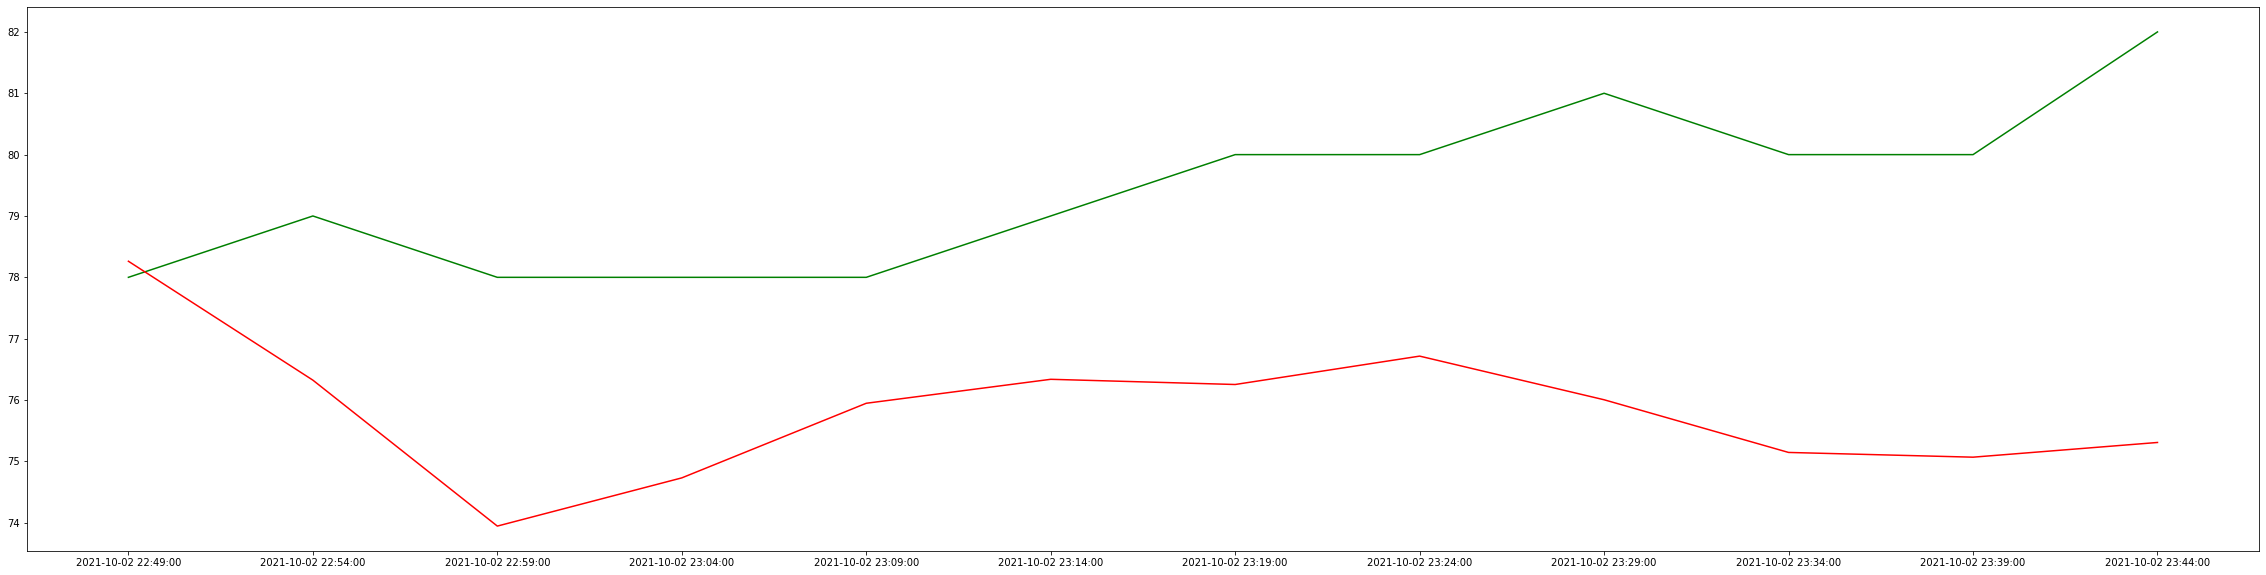

In [10]:
fig, plt1= plt.subplots()
fig.set_figwidth(40)
fig.set_figheight(10)
plt1.plot(time[trainlen:trainlen+12], testing.iloc[0:12,1], color="green")
plt1.plot(time[trainlen:trainlen+12], fc60['predicted_mean'], color="red")

In [11]:
data = pd.read_csv('/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Train/Date/date-2021-09-13.csv', usecols=['time','cgm'])

In [12]:
#substituting the null values of glucose level with the mean of the other values, if present
n = data[data['cgm'].isnull()].index.tolist()
if len(n)!=0:
    data['cgm'][n] = np.mean(data['cgm'])

n = data[data['cgm'].isnull()].index.tolist()
if len(n)!=0:
    data['cgm'][n] = np.mean(data['cgm'])

In [13]:
#changing the data type of the date_time column from object to datetime
time = data['time']
data['time'] = pd.to_datetime(data['time'])

#removing seconds to ensure periodicity
data['time'] = pd.to_datetime(data['time']).dt.floor('T')

In [14]:
trainlen = int(0.9*len(data))
training = data[:trainlen]
testing = data[trainlen:]

model = SARIMAX(training['cgm'], order=(3,1,4), seasonal_order=(3,1,2,7))
model_fit = model.fit()

fc60 = model_fit.forecast(12, alpha = 0.1).reset_index()
fc60.drop(columns='index', inplace=True)
mse60 = mean_squared_error(fc60, testing.iloc[0:12,1])

print('\n60 minute window:\nActual\tPredicted')
for i in range(12):
    print(testing['cgm'][trainlen+i], fc60['predicted_mean'][i])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04140D+00    |proj g|=  5.67082D-02

At iterate    5    f=  2.95594D+00    |proj g|=  6.26877D-02

At iterate   10    f=  2.95105D+00    |proj g|=  1.21134D-02

At iterate   15    f=  2.95009D+00    |proj g|=  6.05286D-03

At iterate   20    f=  2.94990D+00    |proj g|=  3.75183D-03

At iterate   25    f=  2.94864D+00    |proj g|=  5.05610D-02

At iterate   30    f=  2.93299D+00    |proj g|=  1.70205D-01

At iterate   35    f=  2.91995D+00    |proj g|=  1.33345D-01

At iterate   40    f=  2.90865D+00    |proj g|=  6.71869D-02

At iterate   45    f=  2.89721D+00    |proj g|=  7.97566D-02

At iterate   50    f=  2.89540D+00    |proj g|=  2.13315D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/shreyaananth/miniforge3/envs/tf2/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
print("Worst case performance: ")
print('Value after 15 min (Actual,predicted): ',testing['cgm'][trainlen+2], fc60['predicted_mean'][2])
print('Value after 60 min (Actual,predicted): ',testing['cgm'][trainlen+11], fc60['predicted_mean'][11])

print('Root mean squared error: ',math.sqrt(mse60))
print('Mean squared error: ',mse60)

Worst case performance: 
Value after 15 min (Actual,predicted):  138 152.9446407980435
Value after 60 min (Actual,predicted):  126 166.86743623530495
Root mean squared error:  29.469883247802617
Mean squared error:  868.4740186391173


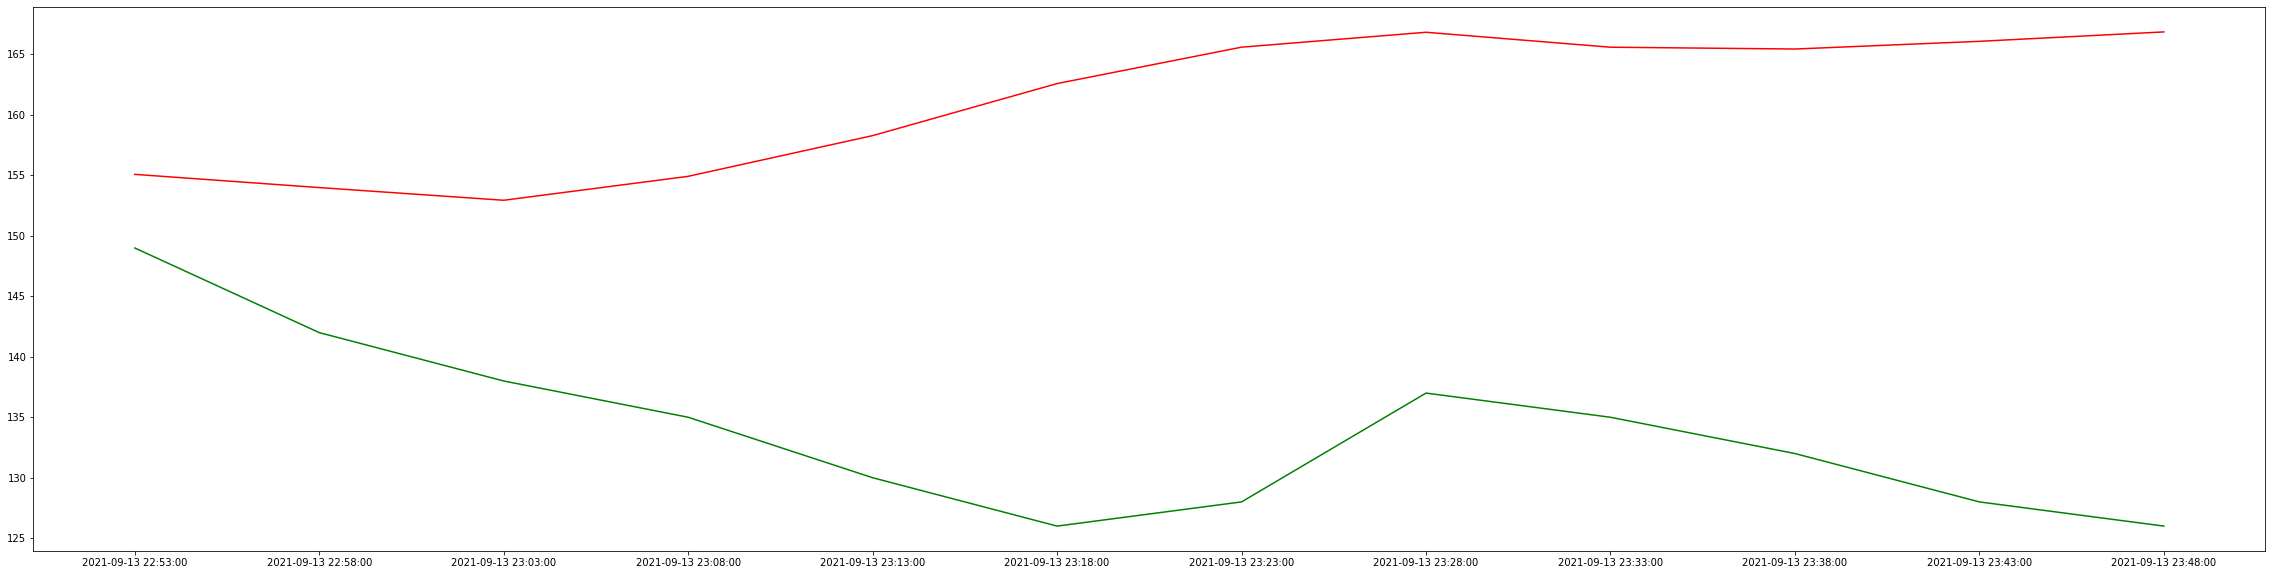

In [16]:
fig, plt1= plt.subplots()
fig.set_figwidth(40)
fig.set_figheight(10)
plt1.plot(time[trainlen:trainlen+12], testing.iloc[0:12,1], color="green")
plt1.plot(time[trainlen:trainlen+12], fc60['predicted_mean'], color="red")